In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
# Load Datasets
X_train = pd.read_csv(os.path.join('..','datasets','prepared_data','X_train_resampled.csv'))
X_test = pd.read_csv(os.path.join('..','datasets','prepared_data','X_test_transformed.csv'))

X_train.shape, X_test.shape

((7244, 23), (2113, 23))

In [3]:
# Apply PCA
pca = PCA()
X_reduced = pca.fit(X_train)

# Varianza explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_

# Determinar el número de componentes necesarios para explicar el 95% de la varianza
threshold = 0.90
intrinsic_dimension = np.argmax(cumulative_variance >= threshold) + 1

print(f"Dimensión intrínseca: {intrinsic_dimension}")

Dimensión intrínseca: 9


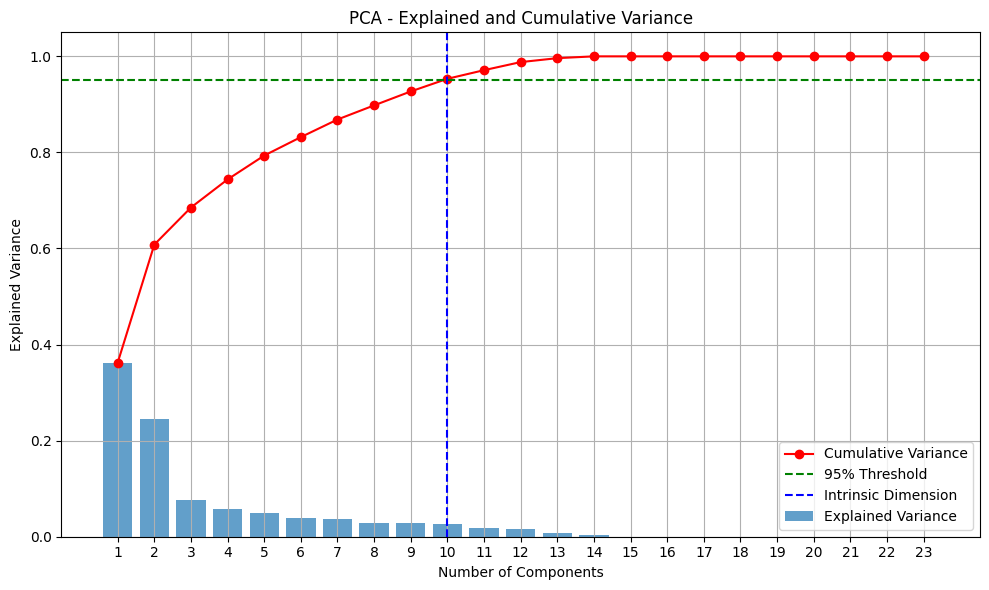

In [4]:
# Visualización
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='r', label='Cumulative Variance')

# Líneas y etiquetas para el umbral
threshold = 0.95
plt.axhline(y=threshold, color='g', linestyle='--', label=f'{int(threshold * 100)}% Threshold')
plt.axvline(x=np.argmax(cumulative_variance >= threshold) + 1, color='b', linestyle='--', label='Intrinsic Dimension')

# Configurar el gráfico
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA - Explained and Cumulative Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
# Apply PCA
pca = PCA(n_components=9)
X_train_reduced = pca.fit_transform(X_train)

# Apply PCA to test set
X_test_reduced = pca.transform(X_test)

In [6]:
X_train_reduced = pd.DataFrame(X_train_reduced)
X_test_reduced = pd.DataFrame(X_test_reduced)

# Save dataframes as CSV Files
X_train_reduced.to_csv(os.path.join('..','datasets','prepared_data','X_train_reduced.csv'), index=False)
X_test_reduced.to_csv(os.path.join('..','datasets','prepared_data','X_test_reduced.csv'), index=False)